## COM361 &mdash; Introdução à Otimização &mdash; 2023, Prof. Amit Bhaya ##

# Descobrindo equações governantes a partir de dados por identificação esparsa de sistemas dinâmicos não lineares. #

#### Leonardo Soares da Costa Tanaka (leonardo.tanaka@poli.ufrj.br), Lincoln Rodrigues Proença (lincoln22220@poli.ufrj.br )

*****

### Índice

1. [Introdução](#1.-Introdução)
1. [Modelo Matemático - Sparse Identification of Nonlinear Dynamics (SINDy)](#1.-Modelo_matemático)
1. [Solução](#3.-Solução)
1. [Resultados e Discussão](#4.-Resultados-e-discussão)
  1. [Subseção Opcional](#4.A.-Acrescente-subseções-se-necessário)
1. [Conclusão](#5.-Conclusão)
1. [Referências bibliográficas](#6.-Referências_bibliográficas)

## 1. Introdução ##

**Introdução**

A análise e compreensão de sistemas dinâmicos são fundamentais em diversos campos científicos e tecnológicos. A capacidade de extrair leis matemáticas subjacentes a dados observacionais é crucial para modelar e prever comportamentos complexos. Uma abordagem inovadora para alcançar essa compreensão é apresentada no artigo "Discovering governing equations from data by sparse identification of nonlinear dynamical systems" (Descobrindo equações governantes a partir de dados pela identificação esparsa de sistemas dinâmicos não lineares).

<p align="center">
  <img src="img/artigo.png" alt="Artigo científico"/>
</p>
<p align="center">
  Figura 1: Artigo científico utilizado para o trabalho
</p>

Este trabalho de conclusão da disciplina de Introdução à Otimização tem como objetivo explorar a formulação matemática proposta no referido artigo para realizar a identificação esparsa de sistemas dinâmicos não lineares, uma técnica conhecida como SINDy (Sparse Identification of Nonlinear Dynamics). Para implementar esta abordagem, optou-se pela linguagem de programação Julia, reconhecida por sua eficiência em computação científica.

<p align="center">
  <img src="img/SINDy.jpeg" alt="SINDy"/>
</p>
<p align="center">
  Figura 2: SINDy (Sparse Identification of Nonlinear Dynamics)
</p>

O processo de implementação e teste foi conduzido utilizando sistemas dinâmicos destacados no artigo original e em seu apêndice, proporcionando uma validação prática da metodologia proposta. A aplicação da técnica SINDy em conjunção com a linguagem Julia visa não apenas compreender os sistemas dinâmicos estudados, mas também fornecer uma plataforma versátil para futuras investigações e aplicações em diferentes domínios.

<p align="center">
  <img src="img/exemplo-sistema.jpeg" alt="Exemplo"/>
</p>
<p align="center">
  Figura 3: Exemplo de sistema dinâmico que pode ser identificado
</p>

Ao longo deste trabalho, exploraremos os fundamentos teóricos do SINDy, discutiremos a formulação matemática subjacente e apresentaremos os detalhes da implementação em Julia. Além disso, compartilharemos os resultados obtidos ao testar a metodologia em sistemas dinâmicos específicos, destacando as contribuições e limitações identificadas durante o processo.

Em última análise, este estudo visa contribuir para o avanço da compreensão e modelagem de sistemas dinâmicos complexos, destacando a aplicação prática da identificação esparsa de equações governantes a partir de dados, conforme proposto pelo SINDy. Além disso, colocar em prática conhecimentos adquiridos ao decorrer da disciplina realizando uma regressão de mínimos quadrados no sistema com regularização de promoção de esparsidade ($L_1$).


## 2. Modelo matemático - Sparse Identification of Nonlinear Dynamics (SINDy) ##

Sparse Identification of Nonlinear Dynamics (SINDy) é um método que busca identificar as equações que descrevem o comportamento de um sistema dinâmico complexo a partir de dados observados. Essa abordagem explora a esparsidade, ou seja, o fato de que em muitos sistemas complexos, apenas algumas variáveis são verdadeiramente importantes para descrever o comportamento global do sistema. SINDy utiliza técnicas de regularização e seleção de características para extrair essas variáveis importantes e construir uma representação matemática simplificada do sistema.

Aqui, consideramos sistemas dinâmicos na forma:

$$
\begin{equation*}
\dot{\mathbf{x}} = \frac{d}{dt}\mathbf{x}(t) = \mathbf{f}(\mathbf{x}(t))
\end{equation*}
$$

O vetor $x(t) \in \mathbb{R}^n$ denota o estado de um sistema no tempo $t$, e a função $f(x(t))$ representa as restrições dinâmicas que definem as equações de movimento do sistema, como a segunda lei de Newton.

Para determinar a função $f$ a partir de dados, coletamos um histórico temporal do estado $x(t)$ e medimos a derivada $\dot{x}(t)$ ou a aproximamos numericamente a partir de $x(t)$. Os dados são amostrados em vários momentos $t_1, t_2, \ldots, t_m$ e organizados em duas matrizes:

$$
\begin{equation*}
\mathbf{X} = \begin{bmatrix}
\mathbf{x}^T(t_1) \\ \mathbf{x}^T(t_2) \\ \vdots \\ \mathbf{x}^T(t_m)
\end{bmatrix} =
\begin{bmatrix}
x_1(t_1) & x_2(t_1) & \cdots & x_n(t_1) \\
x_1(t_2) & x_2(t_2) & \cdots & x_n(t_2) \\
\vdots   & \vdots   & \ddots & \vdots \\
x_1(t_m) & x_2(t_m) & \cdots & x_n(t_m)
\end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\dot{\mathbf{X}} = \begin{bmatrix}
\dot{\mathbf{x}}^T(t_1) \\ \dot{\mathbf{x}}^T(t_2) \\ \vdots \\ \dot{\mathbf{x}}^T(t_m)
\end{bmatrix} =
\begin{bmatrix}
\dot{x}_1(t_1) & \dot{x}_2(t_1) & \cdots & \dot{x}_n(t_1) \\
\dot{x}_1(t_2) & \dot{x}_2(t_2) & \cdots & \dot{x}_n(t_2) \\
\vdots   & \vdots   & \ddots & \vdots \\
\dot{x}_1(t_m) & \dot{x}_2(t_m) & \cdots & \dot{x}_n(t_m)
\end{bmatrix}
\end{equation*}
$$

Em seguida, construímos uma biblioteca $\Theta(\mathbf{X})$ composta por funções não lineares candidatas das colunas de $\mathbf{X}$. Por exemplo, $\Theta(\mathbf{X})$ pode consistir em termos constantes, polinomiais e trigonométricos:

$$
\begin{equation}
\bf{\Theta}(\bf{X}) = \begin{bmatrix}
\vdots & \vdots & \vdots & \vdots & & \vdots & \vdots & \\
1 & \bf{X} & \bf{X}^2 & \bf{X}^3 & \cdots & \sin(\bf{X}) & \cos(\bf{X}) & \cdots\\
\vdots & \vdots & \vdots & \vdots & & \vdots & \vdots &
\end{bmatrix}
\end{equation}
$$

Para os exemplos usados, os dados são coletados para o sistema e empilhados em duas grandes matrizes de dados $\mathbf{X}$ e $\dot{\mathbf{X}}$, onde cada linha de $\mathbf{X}$ é um instantâneo do estado $x$ no tempo, e cada linha de $\dot{\mathbf{X}}$
é um instantâneo da derivada temporal do estado $\dot{x}$ no tempo. Aqui, a dinâmica do lado direito é identificada no espaço de polinômios $\Theta(\mathbf{X})$ em $(x, y, z)$ até a quinta ordem, embora outras funções como $\sin$, $\cos$, $\exp$, ou polinômios de ordem superior possam ser incluídas.

$$
\begin{equation}
\Theta(\mathbf{X}) = \begin{bmatrix}
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
x(t) &
y(t) &
z(t) &
x(t)^2 &
x(t)y(t) &
\dots &
z(t)^5 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots
\end{bmatrix}
\end{equation}
$$

O número de possíveis estruturas de modelo a partir desta biblioteca é combinatoriamente alto. $\textbf{f}(\textbf{x}(t))$ é então substituído por $\bf{\Theta}(\bf{X})$ e um vetor de coeficientes $\bf{\Xi}=\left[\bf{\xi}_1 \bf{\xi}_2 \cdots \bf{\xi}_n \right]$ determinando os termos ativos em $\textbf{f}(\textbf{x}(t))$:

$$
\dot{\bf{X}}=\bf{\Theta}(\bf{X})\bf{\Xi}
$$

Porque apenas alguns termos são esperados para serem ativos em cada ponto no tempo, assume-se que $\textbf{f}(\textbf{x}(t))$ admite uma representação esparsa em $\bf{\Theta}(\bf{X})$. Isso se torna então um problema de otimização em encontrar um $\bf{\Xi}$ esparsa que incorpora de forma ótima $\dot{\textbf{X}}$. Em outras palavras, um modelo é obtido realizando uma regressão de mínimos quadrados no sistema  com regularização de promoção de esparsidade ($L_1$).

$$
\bf{\xi}_k=\underset{\bf{\xi}'_k}{\arg\min}\left|\left|\dot{\bf{X}}_k-\bf{\Theta}(\bf{X})\bf{\xi}'_k\right|\right|_2 +\lambda \left|\left|\bf{\xi}'_k\right|\right|_1
$$

onde $\lambda$ é um parâmetro de regularização. Finalmente, o conjunto esparsa de $\bf{\xi}_k$ pode ser usado para reconstruir o sistema dinâmico:

$$
\dot{x}_k=\bf{\Theta}(\bf{x})\bf{\xi}_k
$$



## 3. Solução ##

### 3.1. Sistema Verdadeiro de Lorenz

#### 3.1.1. Definindo o Sistema
Inicialmente, é necessário definir o Sistema de Lorenz e gerar os pontos que serão posteriormente utilizados para o problema de otimização.

O Sistema de Lorenz é modelado pelas seguintes equações diferenciais ordinárias (EDOs):

$$
\begin{align*}
\frac{dx}{dt} &= \sigma(y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z \\
\end{align*}
$$

Essas equações descrevem a evolução temporal das variáveis $x$, $y$, e $z$, onde $\sigma$, $\rho$, e $\beta$ são parâmetros conhecidos do sistema. Essencialmente, o Sistema de Lorenz é um exemplo clássico de um sistema dinâmico não linear, conhecido por exibir comportamento caótico. A solução dessas equações representa a trajetória no espaço tridimensional ao longo do tempo.

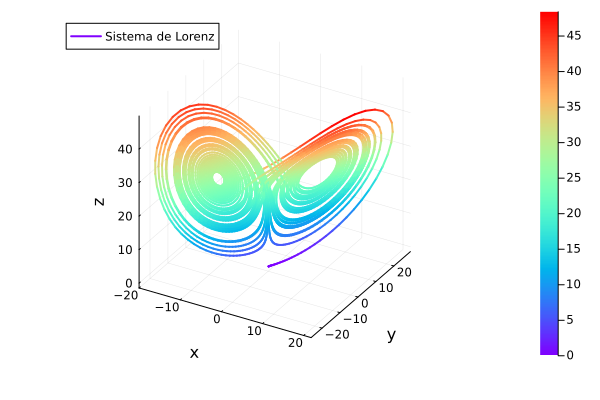

In [11]:
# Importa as bibliotecas necessárias
using DifferentialEquations
using Plots

# Define a função que representa as equações diferenciais do Sistema de Lorenz
function lorenz!(du, u, p, t)
    σ, ρ, β = p
    du[1] = σ * (u[2] - u[1])
    du[2] = u[1] * (ρ - u[3]) - u[2]
    du[3] = u[1] * u[2] - β * u[3]
end

# Condições iniciais e parâmetros comuns para o Sistema de Lorenz
u0 = [0.1, 0.0, 0.0]
p = [10.0, 28.0, 8/3]

# Intervalo de tempo
tspan = (0.0, 60.0) 

# Resolve as equações diferenciais
prob = ODEProblem(lorenz!, u0, tspan, p)
sol_lorenz = solve(prob, Tsit5(), saveat=0.01)  # Reduz o número de pontos de dados

# Cria um array para a coordenada z ao longo do tempo
line_z = sol_lorenz[3, :]

# Plota os resultados com um gradiente de cores do tipo rainbow
plot_obj = plot(sol_lorenz, vars=(1, 2, 3), xlabel="x", ylabel="y", zlabel="z", label="Sistema de Lorenz",
     linewidth=2, linecolor=:auto, color=:rainbow1, line_z=line_z)
display(plot_obj)


#### 3.1.2. Definindo o Modelo

Posteriormente, é necessário definir as componentes do modelo de solução. Para isso, iremos introduzir a matriz $\Theta(\mathbf{X})$, onde os elementos são os candidatos não lineares discutidos anteriormente. Esta matriz é composta por diferentes combinações polinomiais das variáveis do sistema, proporcionando uma representação mais complexa e flexível do comportamento dinâmico. A construção da matriz $\Theta(\mathbf{X})$ é realizada por meio da função previamente definida generate_theta(X).

In [16]:
using Combinatorics

function generate_theta_3d(X)
    n, p = size(X)
    combinations = []  # Inicializa uma lista para armazenar as combinações
    for i in 1:p
        push!(combinations, X[:, i])  # Adiciona X_i (variável original)
        push!(combinations, X[:, i].^2)  # Adiciona X_i^2
        push!(combinations, X[:, i].^3)  # Adiciona X_i^3
        push!(combinations, X[:, i].^4)  # Adiciona X_i^4
        push!(combinations, X[:, i].^5)  # Adiciona X_i^5
        for j in i+1:p
            push!(combinations, X[:, i] .* X[:, j])  # Adiciona X_i * X_j
            push!(combinations, X[:, i].^2 .* X[:, j])  # Adiciona X_i^2 * X_j
            push!(combinations, X[:, i].^3 .* X[:, j])  # Adiciona X_i^3 * X_j
            push!(combinations, X[:, i].^4 .* X[:, j])  # Adiciona X_i^4 * X_j
            push!(combinations, X[:, i] .* X[:, j].^2)  # Adiciona X_i * X_j^2
            push!(combinations, X[:, i] .* X[:, j].^3)  # Adiciona X_i * X_j^3
            push!(combinations, X[:, i] .* X[:, j].^4)  # Adiciona X_i * X_j^4
            push!(combinations, X[:, i].^2 .* X[:, j].^2)  # Adiciona X_i^2 * X_j^2
            push!(combinations, X[:, i].^2 .* X[:, j].^3)  # Adiciona X_i^2 * X_j^3
            for k in j+1:p  # Loop adicional para a terceira variável
                push!(combinations, X[:, i] .* X[:, j] .* X[:, k])  # Adiciona X_i * X_j * X_k
                push!(combinations, X[:, i].^2 .* X[:, j] .* X[:, k])  # Adiciona X_i^2 * X_j * X_k
                push!(combinations, X[:, i] .* X[:, j].^2 .* X[:, k])  # Adiciona X_i * X_j^2 * X_k
                push!(combinations, X[:, i].^2 .* X[:, j].^2 .* X[:, k])  # Adiciona X_i^2 * X_j^2 * X_k
                push!(combinations, X[:, i].^3 .* X[:, j] .* X[:, k])  # Adiciona X_i^3 * X_j * X_k
                push!(combinations, X[:, i] .* X[:, j].^3 .* X[:, k])  # Adiciona X_i * X_j^3 * X_k
                push!(combinations, X[:, i] .* X[:, j] .* X[:, k].^2)  # Adiciona X_i * X_j * X_k^2
                push!(combinations, X[:, i].^2 .* X[:, j] .* X[:, k].^2)  # Adiciona X_i^2 * X_j * X_k^2
                push!(combinations, X[:, i] .* X[:, j].^2 .* X[:, k].^2)  # Adiciona X_i * X_j^2 * X_k^2
            end
        end
    end
    return hcat(combinations...)  # Concatena as combinações em uma matriz
end

# Examplo de uso da função
X = [2 3 5; 1 4 8] # Define uma matriz de exemplo
theta_matrix = generate_theta_3d(X)

# Print a matriz
println(theta_matrix)

[2 4 8 16 32 6 12 24 48 18 54 162 36 108 30 60 90 180 120 270 150 300 450 10 20 40 80 50 250 1250 100 500 3 9 27 81 243 15 45 135 405 75 375 1875 225 1125 5 25 125 625 3125; 1 1 1 1 1 4 4 4 4 16 64 256 16 64 32 32 128 128 32 512 256 256 1024 8 8 8 8 64 512 4096 64 512 4 16 64 256 1024 32 128 512 2048 256 2048 16384 1024 8192 8 64 512 4096 32768]


#### 3.1.3. Definindo e Resolvendo o Problema de Otimização

Por fim, é necessário estabelecer o problema de otimização e organizar sua resolução. Nesse contexto, optou-se por utilizar a biblioteca JuMP em conjunto com o solver Ipopt. A formulação do problema de otimização envolve a minimização de uma função objetivo que busca ajustar os parâmetros do modelo de modo a otimizar a concordância entre as soluções simuladas e os dados observacionais, considerando a presença de ruído nas derivadas. As variáveis de otimização incluem os coeficientes da matriz $\Theta(\mathbf{X})$ e variáveis adicionais associadas à regularização do problema. As restrições epigráficas são incorporadas para garantir que as variáveis de interesse permaneçam dentro de limites desejados.

In [13]:
# Extrai os parâmetros do Sistema de Lorenz
σ, ρ, β = p

# Obtém os valores do tempo e calcula as derivadas em relação ao tempo
t_values_lorenz = sol_lorenz.t
dxdt_values_lorenz = [σ * (sol_lorenz[2, i] - sol_lorenz[1, i]) for i in 1:length(t_values_lorenz)]
dydt_values_lorenz = [sol_lorenz[1, i] * (ρ - sol_lorenz[3, i]) - sol_lorenz[2, i] for i in 1:length(t_values_lorenz)]
dzdt_values_lorenz = [sol_lorenz[1, i] * sol_lorenz[2, i] - β * sol_lorenz[3, i] for i in 1:length(t_values_lorenz)]

# Obtém os valores das coordenadas espaciais
x_values_lorenz = sol_lorenz[1, :]
y_values_lorenz = sol_lorenz[2, :]
z_values_lorenz = sol_lorenz[3, :]

# Cria matrizes para as derivadas em relação ao tempo e as coordenadas espaciais
X_dot = hcat(dxdt_values_lorenz, dydt_values_lorenz, dzdt_values_lorenz)
X = hcat(x_values_lorenz, y_values_lorenz, z_values_lorenz)

# Gera a matriz de combinações polinomiais utilizando a função previamente definida
theta_matrix_lorenz = generate_theta_3d(X)

6001×51 Matrix{Float64}:
  0.1         0.01           0.001        …       0.0          0.0
  0.0917925   0.00842585     0.00077343           2.5519e-20   3.22538e-25
  0.0867921   0.00753287     0.000653793          4.69792e-18  2.18717e-22
  0.0845366   0.00714644     0.000604136          9.36184e-17  9.20877e-21
  0.0846825   0.00717112     0.000607269          7.84602e-16  1.31314e-19
  0.0869831   0.00756605     0.000658118  …       4.22219e-15  1.07627e-18
  0.0912731   0.00833078     0.000760376          1.75767e-14  6.39987e-18
  0.0974549   0.00949745     0.000925573          6.23903e-14  3.11814e-17
  0.105491    0.0111283      0.00117393           1.99746e-13  1.33536e-16
  0.115392    0.0133152      0.00153647           5.97182e-13  5.24969e-16
  ⋮                                       ⋱                    ⋮
 -7.46204    55.6821      -415.502                7.60712e5    2.2466e7
 -7.16413    51.3247      -367.697                7.13945e5    2.0753e7
 -6.8832     47.3784    

In [14]:
using JuMP, Ipopt
# Define o parâmetro de regularização
λ = 0.1

# Cria um modelo de otimização com o otimizador Ipopt
m = Model(Ipopt.Optimizer)
set_optimizer_attribute(m, "print_level", 0)

# Define variáveis de otimização ξ e t
@variable(m, ξ[1:length(theta_matrix_lorenz[1,:]), 1:3])
@variable(m, t[1:length(theta_matrix_lorenz[1,:]), 1:3])

# Adiciona restrições epigráficas
@constraint(m, ξ .<= t)
@constraint(m, -ξ .<= t)

# Define a função objetivo de mínimos quadrados regularizada
@objective(m, Min, sum((X_dot - theta_matrix_lorenz * ξ).^2) + λ * sum(t[i, j] for i in 1:length(theta_matrix_lorenz[1,:]), j in 1:3))

# Otimiza o modelo
optimize!(m)

# Obtém os valores das variáveis de otimização ξ após a otimização
ξ_values_lorenz = value.(ξ)

51×3 Matrix{Float64}:
 -8.93977      26.6986        1.55003e-5
 -0.00773772    0.0106915     0.00074624
 -0.00252767    0.00311537    1.42572e-5
 -8.82265e-6    1.55953e-5   -2.14615e-6
  2.5617e-6    -2.62967e-6    2.91258e-8
 -7.95273e-6   -5.31101e-6    0.997648
 -0.000346819   0.00113664   -5.36769e-5
  1.54375e-5   -2.09529e-5   -7.31005e-6
 -9.37033e-7    4.70039e-7   -1.39187e-8
  0.00362598   -0.00525831    4.95218e-5
  ⋮                          
  3.59457e-5   -4.56738e-5   -2.11669e-8
  2.92389e-8   -4.20857e-8    1.88395e-9
  4.3762e-6    -5.39962e-6   -1.02551e-6
  9.56002e-9   -2.8578e-8     3.3028e-8
 -0.000435275   0.000513849  -2.66571
  0.000106649  -0.000115832  -0.000267659
 -5.07115e-6    3.55433e-6    2.71065e-5
 -8.66715e-8    2.85638e-7   -1.18724e-6
  7.01225e-9   -1.27175e-8    1.91378e-8

#### 3.1.4. Resolvendo o Problema com Ruído

A resolução do problema de otimização é estendida para lidar com a presença de ruído nas derivadas do Sistema de Lorenz. Este aspecto é crucial para simular condições mais realistas, semelhantes às observações experimentais ou de campo. A introdução de ruído nas derivadas busca replicar a variabilidade inerente aos dados do mundo real. Ao abordar esse cenário, a resolução do problema otimizado leva em consideração a incerteza associada às medições, contribuindo para um ajuste mais robusto e adaptável do modelo às condições reais. A implementação dessa abordagem ampliada permite uma análise mais abrangente e realista do Sistema de Lorenz, incorporando os desafios e a complexidade inerentes à obtenção e interpretação de dados dinâmicos.

In [15]:
# Extrai os parâmetros do Sistema de Lorenz
σ, ρ, β = p

# Obtém os valores do tempo e adiciona ruído às derivadas
t_values_lorenz_r = sol_lorenz.t
noise_intensity = 1
dxdt_values_lorenz_r = [σ * (sol_lorenz[2, i] - sol_lorenz[1, i]) + noise_intensity * randn() for i in 1:length(sol_lorenz.t)]
dydt_values_lorenz_r = [sol_lorenz[1, i] * (ρ - sol_lorenz[3, i]) - sol_lorenz[2, i] + noise_intensity * randn() for i in 1:length(sol_lorenz.t)]
dzdt_values_lorenz_r = [sol_lorenz[1, i] * sol_lorenz[2, i] - β * sol_lorenz[3, i] + noise_intensity * randn() for i in 1:length(sol_lorenz.t)]

# Obtém os valores das coordenadas espaciais
x_values_lorenz_r = sol_lorenz[1, :]
y_values_lorenz_r = sol_lorenz[2, :]
z_values_lorenz_r = sol_lorenz[3, :]

# Cria matrizes para as derivadas com ruído e as coordenadas espaciais
X_dot = hcat(dxdt_values_lorenz_r, dydt_values_lorenz_r, dzdt_values_lorenz_r)
X = hcat(x_values_lorenz_r, y_values_lorenz_r, z_values_lorenz_r)

# Gera a matriz de combinações polinomiais utilizando a função previamente definida
theta_matrix_lorenz_r = generate_theta_3d(X)

# Utiliza JuMP e Ipopt para resolver o problema de otimização
using JuMP, Ipopt
λ = 0.1
m = Model(Ipopt.Optimizer)
set_optimizer_attribute(m, "print_level", 0)

# Corrige a definição da variável ξ
@variable(m, ξ[1:length(theta_matrix_lorenz_r[1,:]), 1:3])
@variable(m, t[1:length(theta_matrix_lorenz_r[1,:]), 1:3])

# Adiciona restrições epigráficas
@constraint(m, ξ .<= t)
@constraint(m, -ξ .<= t)

# Define a função objetivo de mínimos quadrados regularizada
@objective(m, Min, sum((X_dot - theta_matrix_lorenz_r * ξ).^2) + λ * sum(t[i, j] for i in 1:length(theta_matrix_lorenz_r[1,:]), j in 1:3))

# Otimiza o modelo
optimize!(m)

# Obtém os valores das variáveis de otimização ξ após a otimização
ξ_values_lorenz_r = value.(ξ)


51×3 Matrix{Float64}:
 -4.9767       23.0895       -2.60081
 -0.25936       0.927367      0.167206
 -0.0337048     0.00948043   -0.00214957
 -0.00129404    0.00170899   -0.0020555
 -0.000118773   1.04816e-6   -0.000124382
  0.135528     -1.20306       0.752024
 -0.0799715     0.00509127   -0.142467
  0.000279618  -0.0027985     0.00303813
  0.000189312  -1.04213e-5    0.000171308
  0.134232     -0.0154852     0.1687
  ⋮                          
  0.000413227   6.88219e-6    0.000186119
 -2.63228e-7   -2.42054e-6    1.54387e-6
 -0.000104208   0.000185243   0.000242375
  6.07062e-6    6.64237e-8    1.39933e-6
  0.00211588   -0.104451     -2.72303
 -0.00339101    0.0120253     0.0190132
  0.00100686    0.000198494  -0.00193432
 -8.0751e-5    -5.75768e-5    7.53582e-5
  1.95462e-6    1.51948e-6   -9.52489e-7

### 3.2 

## 4. Resultados e discussão ##

Neste seção, os resultados obtidos serão exibidos e discutidos. Mostre figuras, gráficos, imagens, curvas de compromisso, e o que mais puder melhor ilustrar seus resultados. A discussão deverá explicar o que significam os resultados e como interpretá-los. As limitações da sua abordagem/modelo também devem ser colocadas, bem como uma análise da sensibilidade dos resultados em relação às hipóteses feitas.


Utilize plots (veja exemplos  `PyPlot` [aqui](https://gist.github.com/gizmaa/7214002))

Aqui está um exemplo de uma tabela (em Markdown):

| Tabelas        | São           | Boas  |
| ------------- |:-------------:| -----:|
| col 3 é      | alinhado à direita |\$1600 |
| col 2 é      | centrado      |  \$12 |
| texto | também serve      |   \$1 |

### 4.A. Subseções devem ser utilizadas para organizar seu texto.

#### 4.A.a. ou até subsubseções.

## 5. Conclusão ##

Faça um resumo do que encontrou e dos seus resultados, e fale de pelo menos uma direção na qual  seu trabalho pode ser desenvolvido no futuro, algo que poderia ser interessante em decorrência do seu projeto.


## 6. Referências bibliográficas ##

[1] Brunton, S. L., Proctor, J. L., & Kutz, J. N. (2016). *Descoberta de equações governantes a partir de dados por identificação esparsa de sistemas dinâmicos não lineares.* *Proceedings of the National Academy of Sciences*, 113(15), 3932-3937. DOI: [10.1073/pnas.1517384113](https://doi.org/10.1073/pnas.1517384113)

[2] Brunton, S. L., Proctor, J. L., & Kutz, J. N. (2016). *Descoberta de equações governantes a partir de dados: Identificação esparsa de sistemas dinâmicos não lineares - Informações de suporte.* *Proceedings of the National Academy of Sciences*, 113(15), 3932-3937. DOI: [10.1073/pnas.1517384113](https://doi.org/10.1073/pnas.1517384113)

[3] Brunton, S. (2023). *Physics Informed Machine Learning Playlist.* [YouTube Playlist](https://www.youtube.com/playlist?list=PLMrJAkhIeNNQ0BaKuBKY43k4xMo6NSbBa). Última atualização em 31 de mar. de 2023.
